In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from os import path, getcwd, chdir

In [2]:
path = f"{getcwd()}/mnist.npz"
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)

In [3]:
print ("number of training examples = " + str(training_images.shape[0]))
print ("number of test examples = " + str(test_images.shape[0]))
print ("X_train shape: " + str(training_images.shape))
print ("Y_train shape: " + str(training_labels.shape))
print ("X_test shape: " + str(test_images.shape))
print ("Y_test shape: " + str(test_labels.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


label = 9


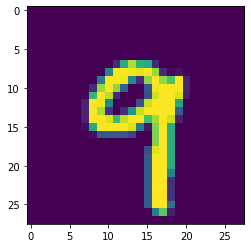

In [5]:
import random
# Example of a random training image along with its label
# Run cell again to see another example
index = random.randrange(0, 60000)
plt.imshow(training_images[index])
print ("label = " + str(training_labels[index]))

In [6]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached 99.9% training! Stopping now.")
            self.model.stop_training = True
callbacks = myCallback()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=40, batch_size=64, callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/40
938/938 [==============================] - 3s 3ms/step - loss: 0.1802 - accuracy: 0.9471
Epoch 2/40
938/938 [==============================] - 3s 3ms/step - loss: 0.0586 - accuracy: 0.9828
Epoch 3/40
938/938 [==============================] - 2s 3ms/step - loss: 0.0374 - accuracy: 0.9888
Epoch 4/40
938/938 [==============================] - 2s 3ms/step - loss: 0.0255 - accuracy: 0.9922
Epoch 5/40
938/938 [==============================] - 3s 3ms/step - loss: 0.0175 - accuracy: 0.9943
Epoch 6/40
938/938 [==============================] - 2s 3ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 7/40
938/938 [==============================] - 2s 3ms/step - loss: 0.0093 - accuracy: 0.9971
Epoch 8/40
938/938 [==============================] - 2s 3ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 9/40
938/938 [==============================] - 3s 3ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 10/40
938/938 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9985

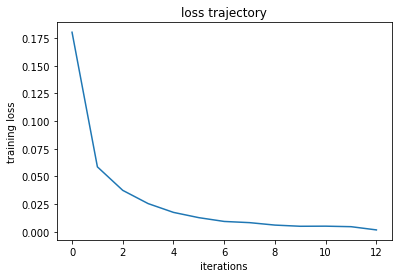

In [8]:
plt.ylabel('training loss')
plt.xlabel('iterations')
plt.title('loss trajectory')
plt.plot(history.history['loss'])
plt.show()

In [10]:
print("Train Accuracy:", history.history['accuracy'][-1])
print("Test Accuracy:", test_acc)
print("Variance = ", history.history['accuracy'][-1] - test_acc)

Train Accuracy: 0.9994833469390869
Test Accuracy: 0.9861000180244446
Variance =  0.013383328914642334


In [18]:
model_d = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [19]:
model_d.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_d.fit(training_images, training_labels, epochs=80, batch_size=64, callbacks=[callbacks])
test_loss, test_acc = model_d.evaluate(test_images, test_labels)

Epoch 1/80
938/938 [==============================] - 3s 3ms/step - loss: 0.2157 - accuracy: 0.9358
Epoch 2/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0789 - accuracy: 0.9767
Epoch 3/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0546 - accuracy: 0.9830
Epoch 4/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 5/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0360 - accuracy: 0.9883
Epoch 6/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0275 - accuracy: 0.9911
Epoch 7/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0249 - accuracy: 0.9916
Epoch 8/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 9/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0179 - accuracy: 0.9935
Epoch 10/80
938/938 [==============================] - 3s 3ms/step - loss: 0.0174 - accuracy: 0.9942

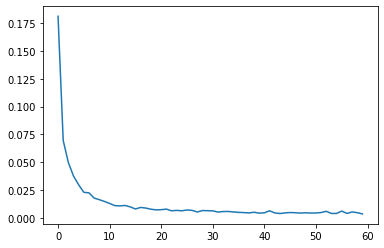

In [ ]:
plt.ylabel('training loss')
plt.xlabel('iterations')
plt.title('loss trajectory after adding dropout')
plt.plot(history.history['loss'])
plt.show()

In [20]:
print("Train Accuracy:", history.history['accuracy'][-1])
print("Test Accuracy:", test_acc)
print("Variance = ", history.history['accuracy'][-1] - test_acc)

Train Accuracy: 0.9991333484649658
Test Accuracy: 0.9891999959945679
Variance =  0.00993335247039795


In [23]:
model.predict(training_images[index].reshape(1, 28, 28, 1))

array([[2.8530154e-18, 2.2099177e-19, 2.2678060e-16, 4.9038014e-13,
        1.5321524e-08, 2.2812158e-12, 9.2106917e-20, 3.8509343e-12,
        8.9661102e-13, 1.0000000e+00]], dtype=float32)

In [25]:
model1_pred = np.argmax(model.predict(training_images[index].reshape(1, 28, 28, 1)))
model2_pred = np.argmax(model_d.predict(training_images[index].reshape(1, 28, 28, 1)))
print("The first model prediction on the random image shown above is:", model1_pred)
print("The second model prediction on the random image shown above is:", model2_pred)

The first model prediction on the random image shown above is: 9
The second model prediction on the random image shown above is: 9
